In [5]:
import seaborn as sns
import pandas as pd

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [7]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [12]:
df.groupby('sex').mean()

,total_bill,tip,size
sex,,,
Male,20.744076,3.089618,2.630573
Female,18.056897,2.833448,2.459770


In [13]:
df['sex'].unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

In [16]:
df['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

<Axes: xlabel='total_bill', ylabel='tip'>

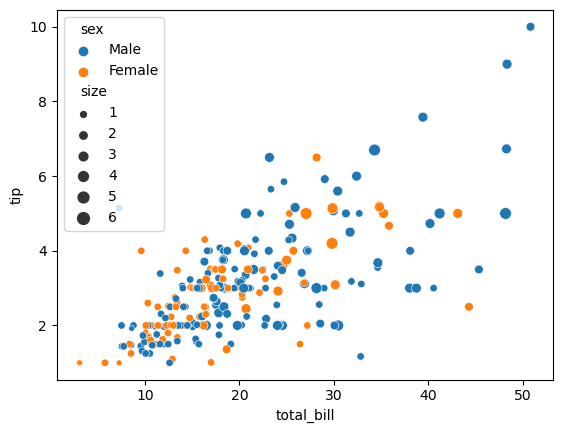

In [20]:
sns.scatterplot(x=df['total_bill'], y=df['tip'], hue=df['sex'], size=df['size'])

<Axes: xlabel='total_bill', ylabel='tip'>

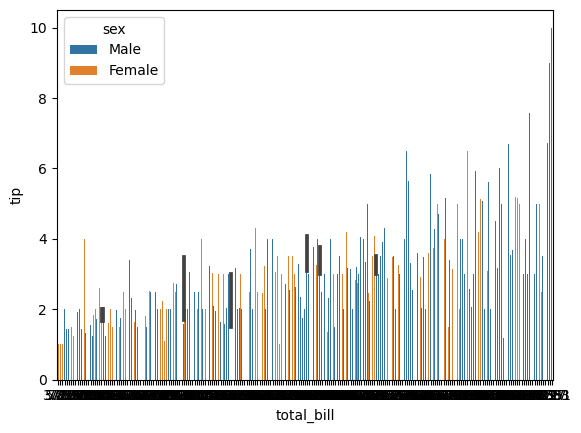

In [22]:
sns.barplot(x=df['total_bill'], y=df['tip'], hue=df['sex'])

<Axes: xlabel='total_bill', ylabel='tip'>

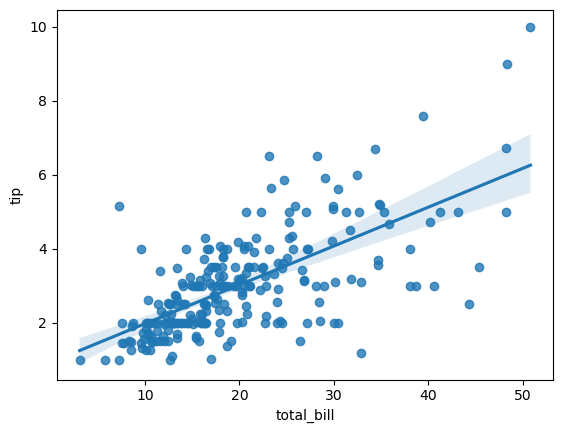

In [23]:
sns.regplot(x=df['total_bill'], y=df['tip'])

<Axes: xlabel='total_bill', ylabel='tip'>

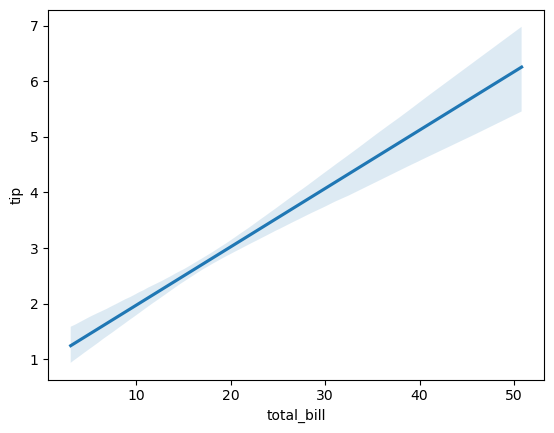

In [24]:
sns.regplot(x=df['total_bill'], y=df['tip'], scatter=False)

<Axes: xlabel='total_bill', ylabel='tip'>

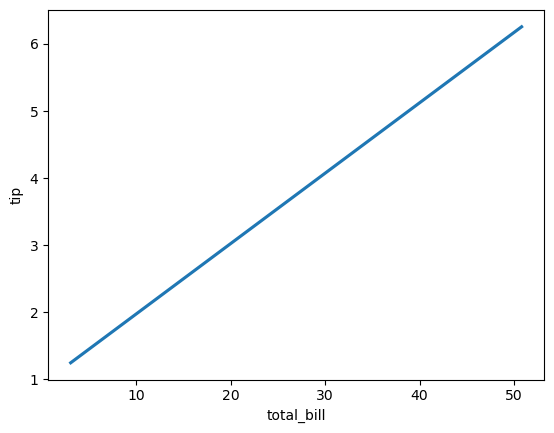

In [25]:
sns.regplot(x=df['total_bill'], y=df['tip'], scatter=False, ci=None)

<Axes: >

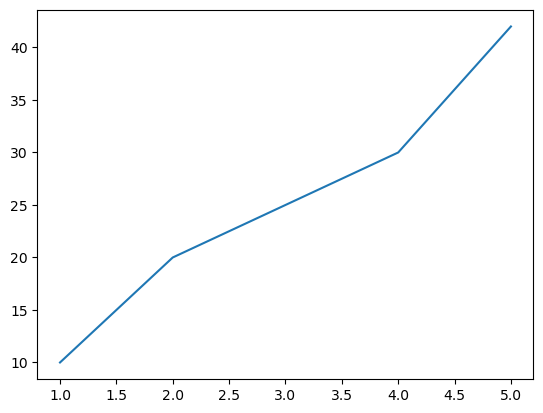

In [27]:
x = [1,2,3,4,5]
y = [10, 20, 25, 30, 42]
sns.lineplot(x=x, y=y)

<Axes: xlabel='size', ylabel='tip'>

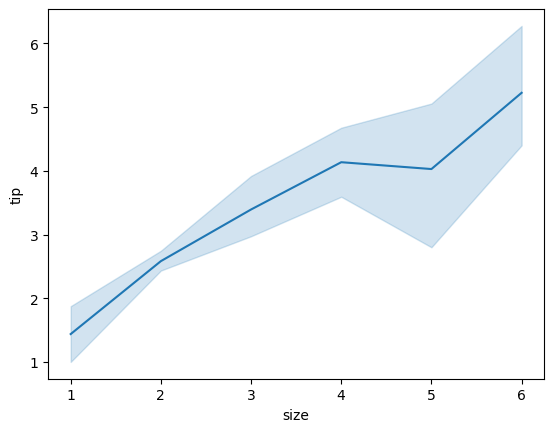

In [28]:
sns.lineplot(x=df['size'], y=df['tip'])

In [30]:
# size가 5일 때 tip의 최소값과 최대값
print("min: {}, max: {}".format(min(df[df['size'] == 5]['tip']), max(df[df['size'] == 5]['tip'])))

min: 2.0, max: 5.14


<Axes: xlabel='size', ylabel='tip'>

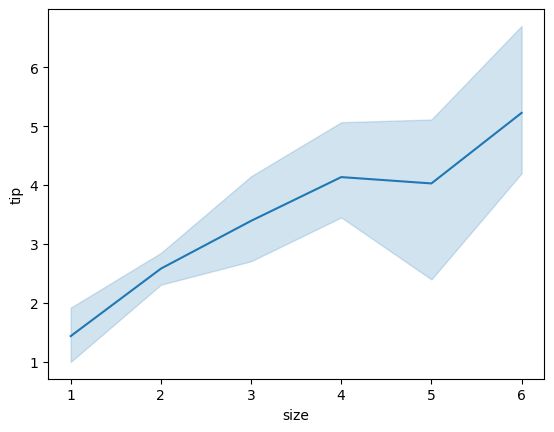

In [32]:
sns.lineplot(x=df['size'], y=df['tip'], errorbar=('ci', 100))

<Axes: xlabel='size', ylabel='tip'>

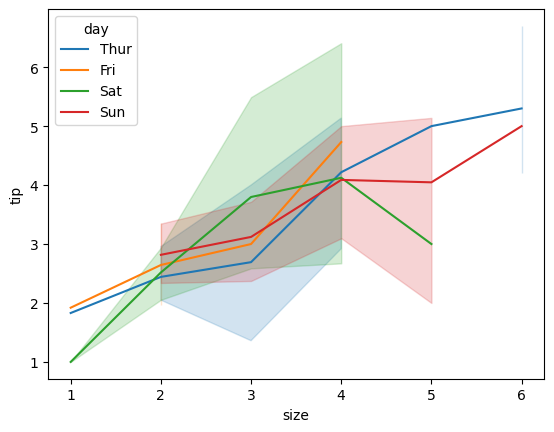

In [33]:
sns.lineplot(x=df['size'], y=df['tip'], hue=df['day'], errorbar=('ci', 100))

<Axes: xlabel='size', ylabel='tip'>

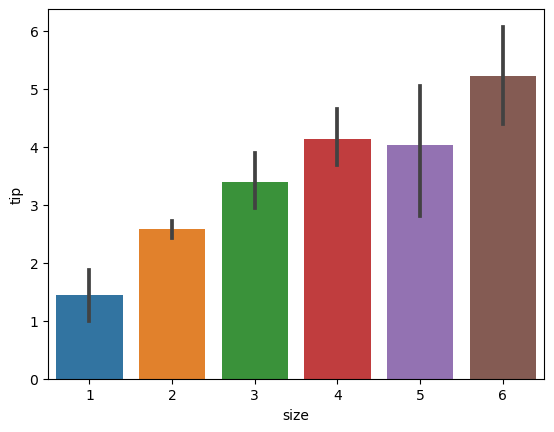

In [34]:
sns.barplot(x=df['size'], y=df['tip'])

<Axes: xlabel='size', ylabel='tip'>

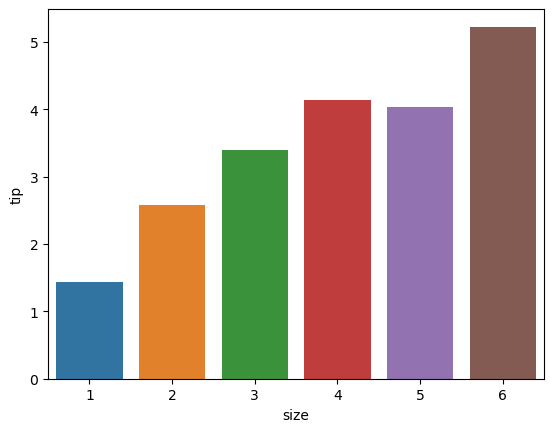

In [36]:
sns.barplot(x=df['size'], y=df['tip'], errorbar=None)

<Axes: xlabel='day', ylabel='count'>

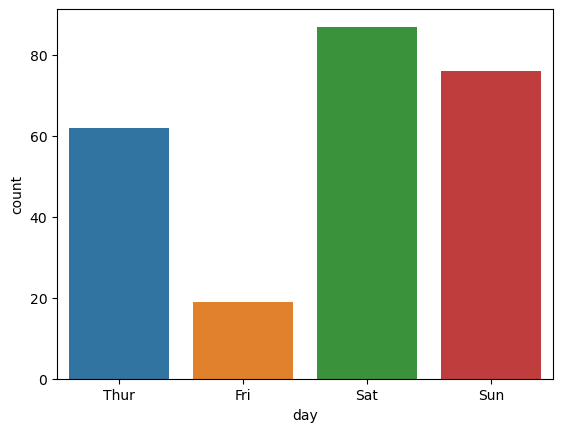

In [37]:
sns.countplot(x=df['day'])

In [38]:
df['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

<Axes: xlabel='day', ylabel='tip'>

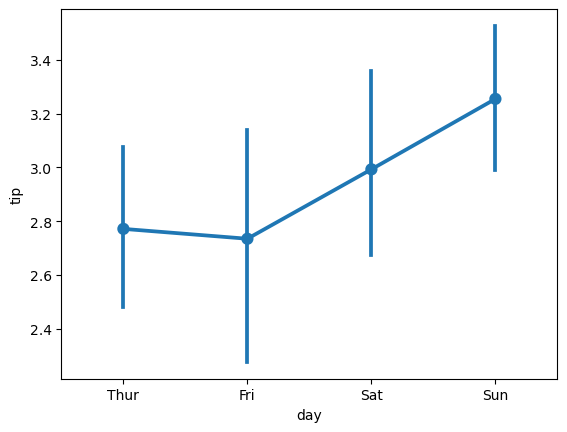

In [40]:
sns.pointplot(x=df['day'], y=df['tip'])

<Axes: xlabel='size', ylabel='tip'>

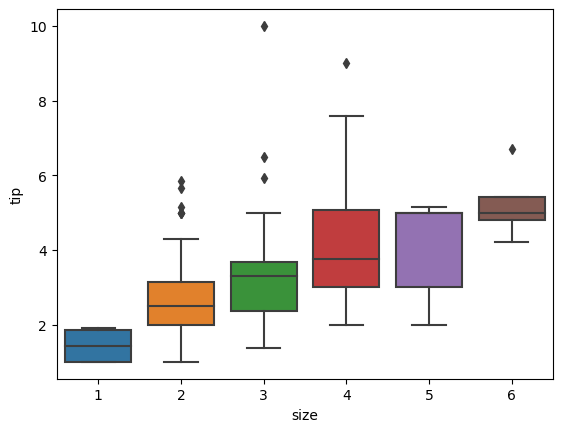

In [52]:
sns.boxplot(x=df['size'], y=df['tip'], orient="v")

<Axes: xlabel='size', ylabel='tip'>

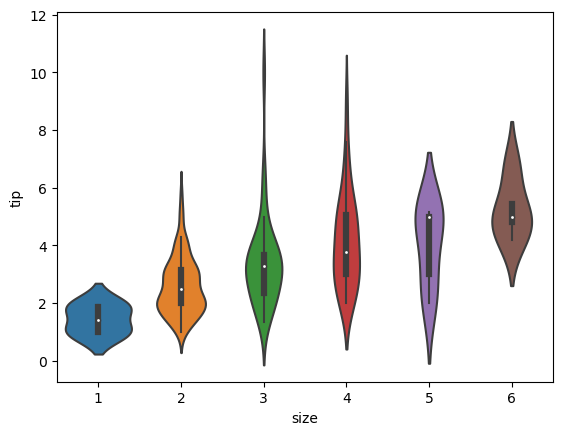

In [53]:
sns.violinplot(x=df['size'], y=df['tip'], orient="v")

<Axes: xlabel='total_bill', ylabel='Count'>

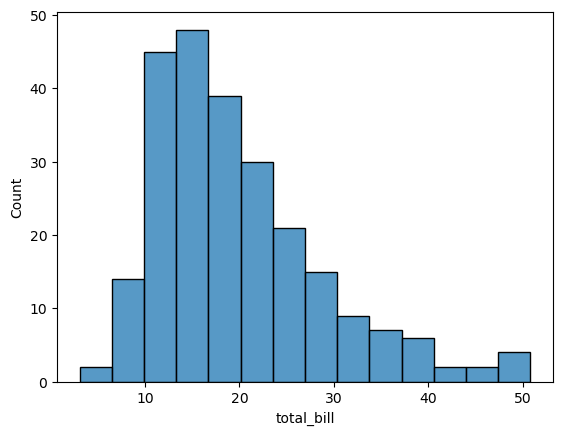

In [54]:
sns.histplot(x=df['total_bill'])

<Axes: xlabel='total_bill', ylabel='Count'>

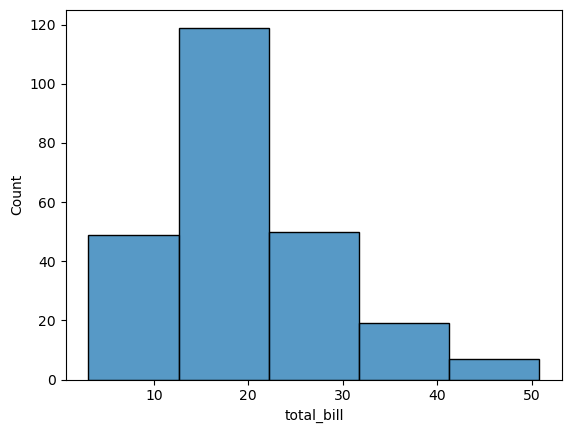

In [55]:
sns.histplot(x=df['total_bill'], bins=5)

<Axes: xlabel='total_bill', ylabel='Count'>

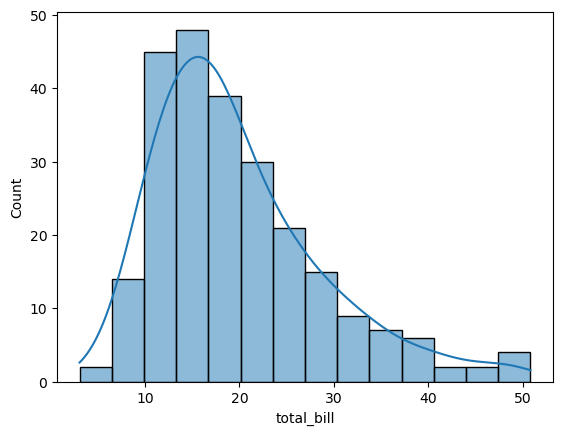

In [56]:
sns.histplot(x=df['total_bill'], kde=True)

<Axes: xlabel='total_bill', ylabel='Density'>

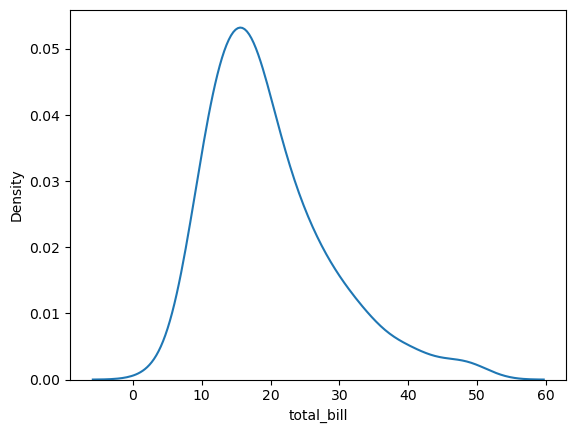

In [57]:
sns.kdeplot(data=df['total_bill'])

<Axes: xlabel='total_bill'>

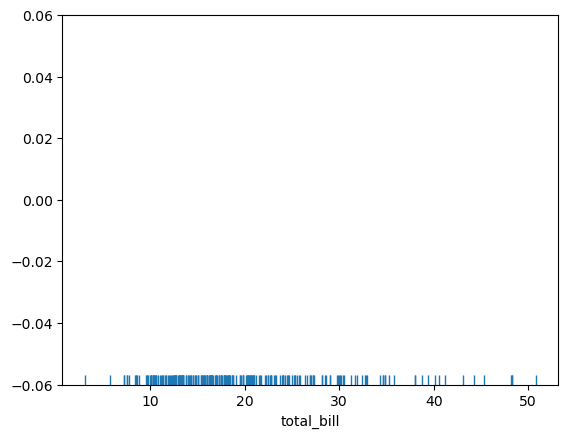

In [58]:
sns.rugplot(data=df['total_bill'])

<Axes: xlabel='day', ylabel='Count'>

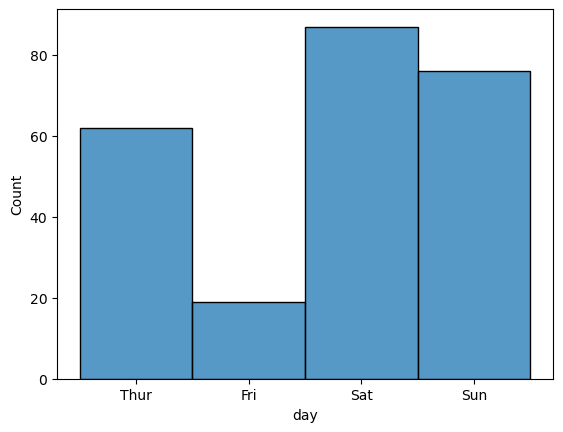

In [59]:
sns.histplot(data=df['day'])

<Axes: xlabel='day', ylabel='count'>

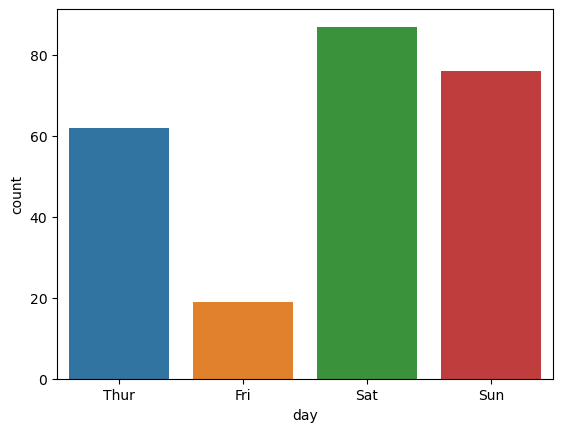

In [60]:
sns.countplot(x=df['day'])

In [63]:
pivot_df = df.pivot_table('tip', 'day', 'size', aggfunc='count')
pivot_df

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [64]:
pivot_df = df.pivot_table('tip', 'day', 'size')
pivot_df

size,1,2,3,4,5,6
day,,,,,,
Thur,1.83,2.442500,2.692500,4.218000,5.000000,5.3
Fri,1.92,2.644375,3.000000,4.730000,NaN,NaN
Sat,1.00,2.517547,3.797778,4.123846,3.000000,NaN
Sun,NaN,2.816923,3.120667,4.087778,4.046667,5.0


<Axes: xlabel='size', ylabel='day'>

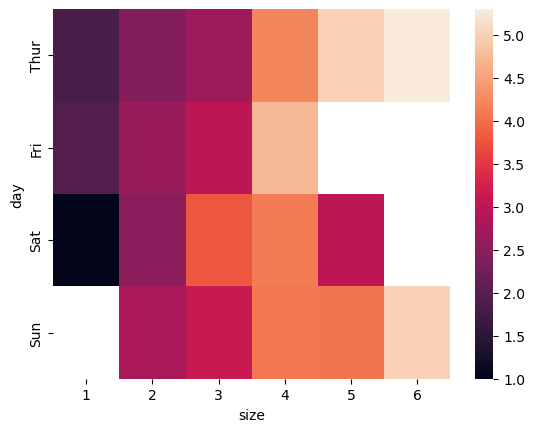

In [65]:
sns.heatmap(pivot_df)

In [70]:
# 결측치 없애기
pivot_df.fillna(0, inplace=True)
pivot_df

size,1,2,3,4,5,6
day,,,,,,
Thur,1.83,2.442500,2.692500,4.218000,5.000000,5.3
Fri,1.92,2.644375,3.000000,4.730000,0.000000,0.0
Sat,1.00,2.517547,3.797778,4.123846,3.000000,0.0
Sun,0.00,2.816923,3.120667,4.087778,4.046667,5.0


<Axes: xlabel='size', ylabel='day'>

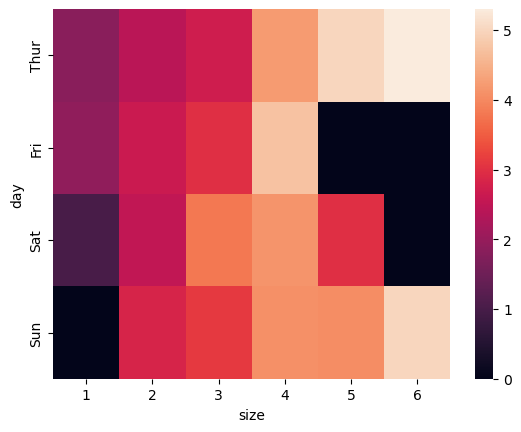

In [71]:
sns.heatmap(pivot_df, annot=Tru)